In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-insurance-company-tic-benchmark/dictionary.txt
/kaggle/input/the-insurance-company-tic-benchmark/tic_2000_eval_data.csv
/kaggle/input/the-insurance-company-tic-benchmark/tic_2000_train_data.csv
/kaggle/input/the-insurance-company-tic-benchmark/tic_2000_target_data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [3]:
import plotly.graph_objs as go

In [4]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
train_data = pd.read_csv('/kaggle/input/the-insurance-company-tic-benchmark/tic_2000_train_data.csv')
eval1 = pd.read_csv('/kaggle/input/the-insurance-company-tic-benchmark/tic_2000_eval_data.csv')
target = pd.read_csv('/kaggle/input/the-insurance-company-tic-benchmark/tic_2000_target_data.csv')

In [6]:
train_data.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


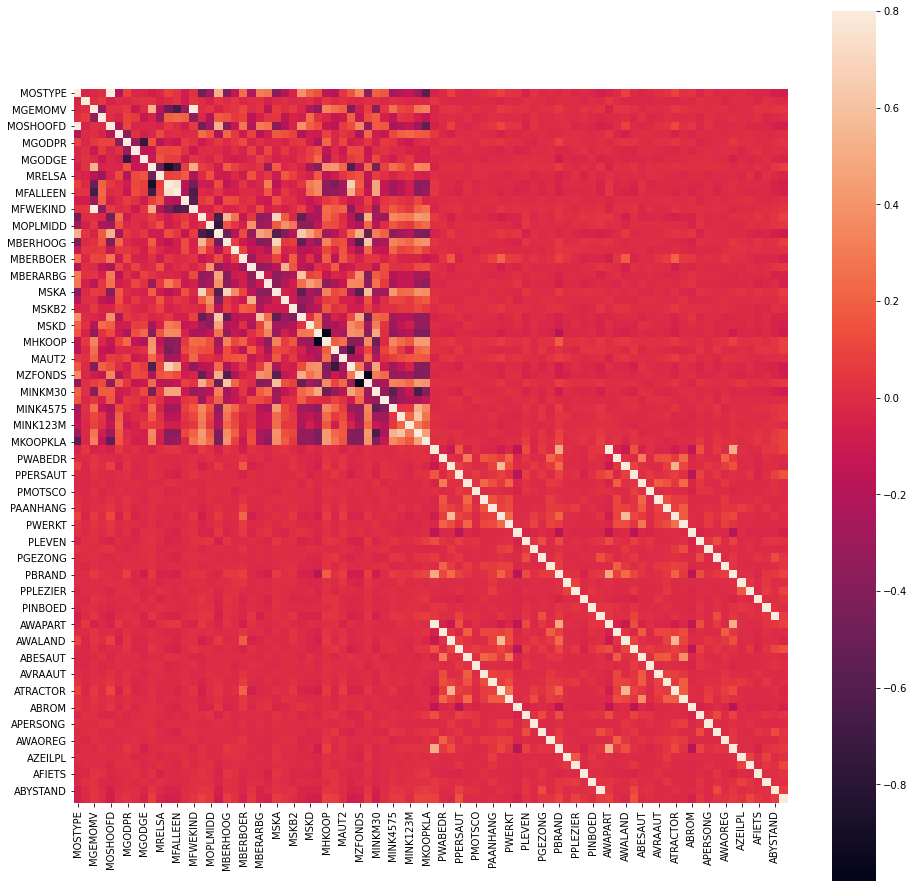

In [7]:
#Correlation matrix
corrmat = train_data.corr()
fig = plt.figure(figsize = (16, 16))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [8]:
cols=list(train_data.columns)
cols

['MOSTYPE',
 'MAANTHUI',
 'MGEMOMV',
 'MGEMLEEF',
 'MOSHOOFD',
 'MGODRK',
 'MGODPR',
 'MGODOV',
 'MGODGE',
 'MRELGE',
 'MRELSA',
 'MRELOV',
 'MFALLEEN',
 'MFGEKIND',
 'MFWEKIND',
 'MOPLHOOG',
 'MOPLMIDD',
 'MOPLLAAG',
 'MBERHOOG',
 'MBERZELF',
 'MBERBOER',
 'MBERMIDD',
 'MBERARBG',
 'MBERARBO',
 'MSKA',
 'MSKB1',
 'MSKB2',
 'MSKC',
 'MSKD',
 'MHHUUR',
 'MHKOOP',
 'MAUT1',
 'MAUT2',
 'MAUT0',
 'MZFONDS',
 'MZPART',
 'MINKM30',
 'MINK3045',
 'MINK4575',
 'MINK7512',
 'MINK123M',
 'MINKGEM',
 'MKOOPKLA',
 'PWAPART',
 'PWABEDR',
 'PWALAND',
 'PPERSAUT',
 'PBESAUT',
 'PMOTSCO',
 'PVRAAUT',
 'PAANHANG',
 'PTRACTOR',
 'PWERKT',
 'PBROM',
 'PLEVEN',
 'PPERSONG',
 'PGEZONG',
 'PWAOREG',
 'PBRAND',
 'PZEILPL',
 'PPLEZIER',
 'PFIETS',
 'PINBOED',
 'PBYSTAND',
 'AWAPART',
 'AWABEDR',
 'AWALAND',
 'APERSAUT',
 'ABESAUT',
 'AMOTSCO',
 'AVRAAUT',
 'AAANHANG',
 'ATRACTOR',
 'AWERKT',
 'ABROM',
 'ALEVEN',
 'APERSONG',
 'AGEZONG',
 'AWAOREG',
 'ABRAND',
 'AZEILPL',
 'APLEZIER',
 'AFIETS',
 'AINBOED',
 '

In [9]:
colors=['#b84949', '#ff6f00', '#ffbb00', '#9dff00', '#329906', '#439c55', '#67c79e', '#00a1db', '#002254', '#5313c2', '#c40fdb', '#e354aa']

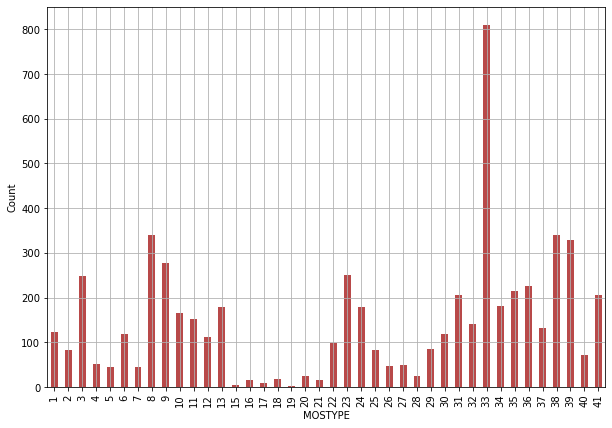

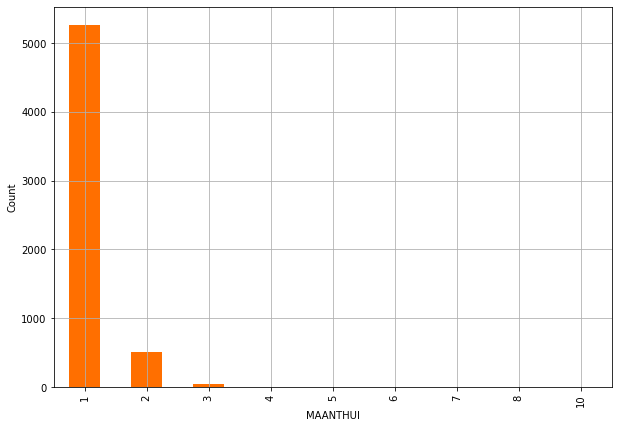

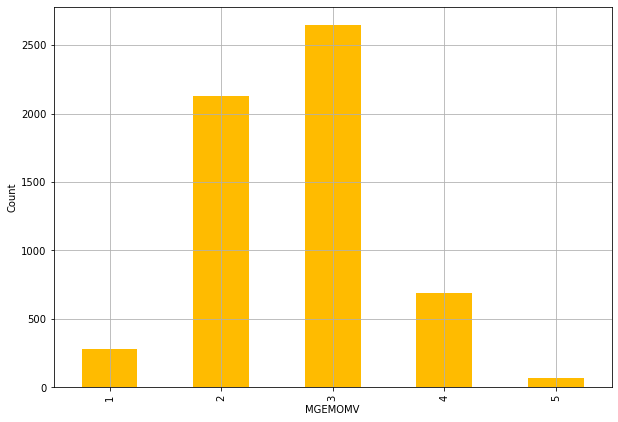

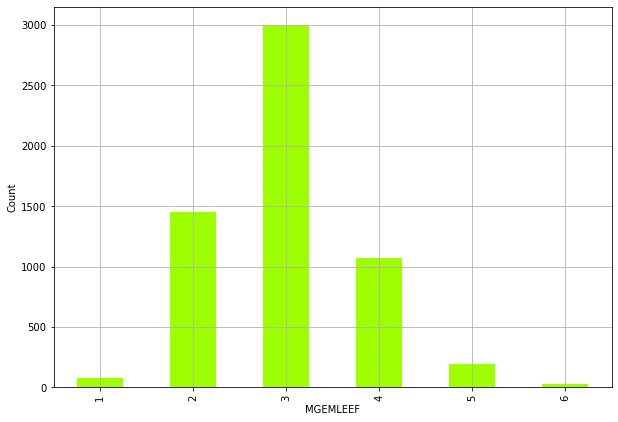

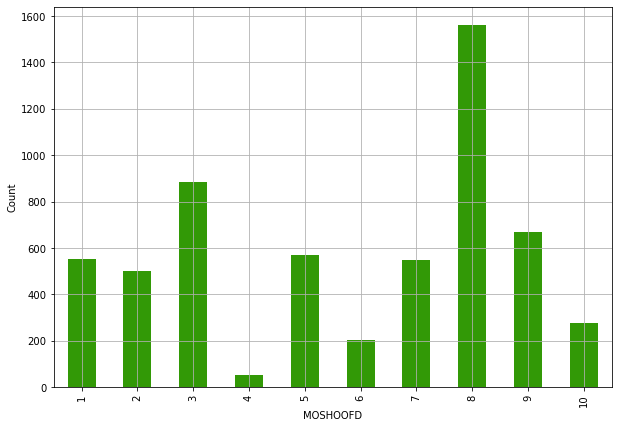

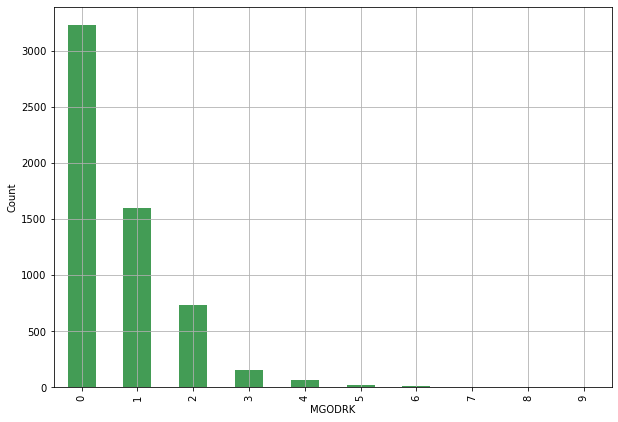

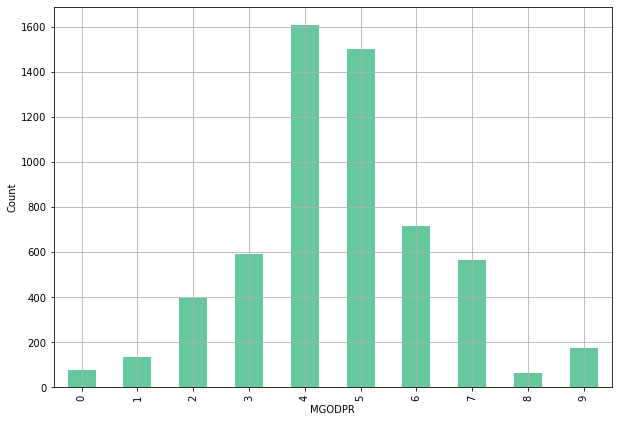

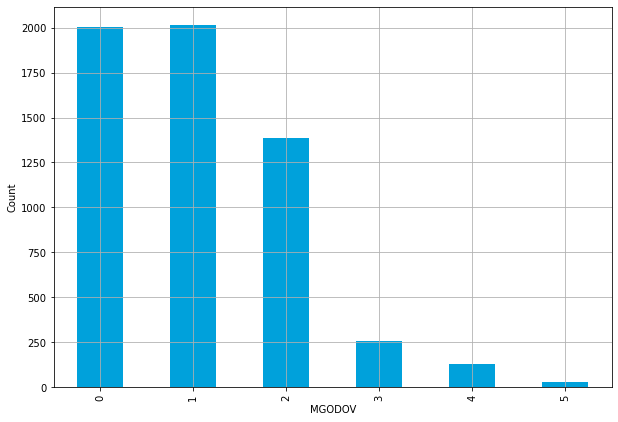

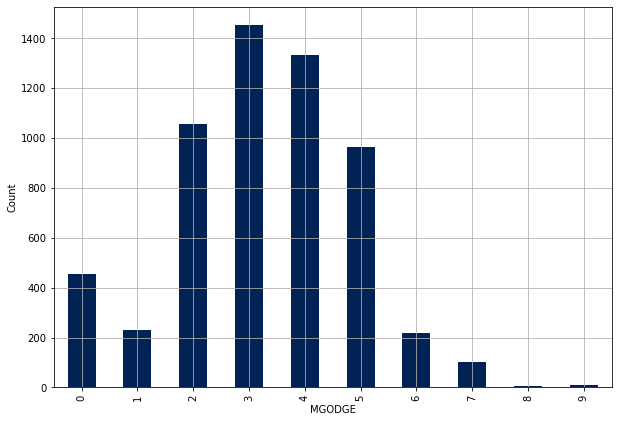

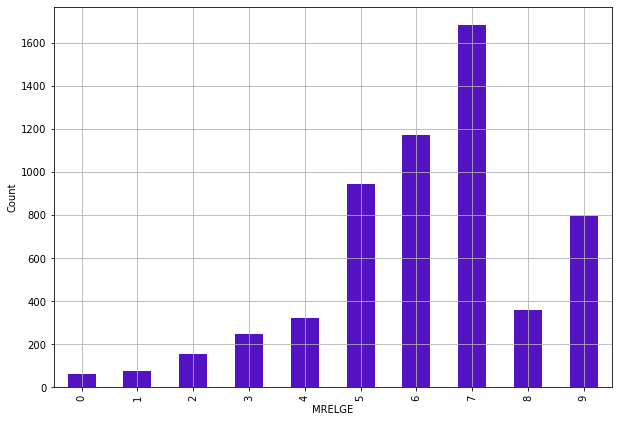

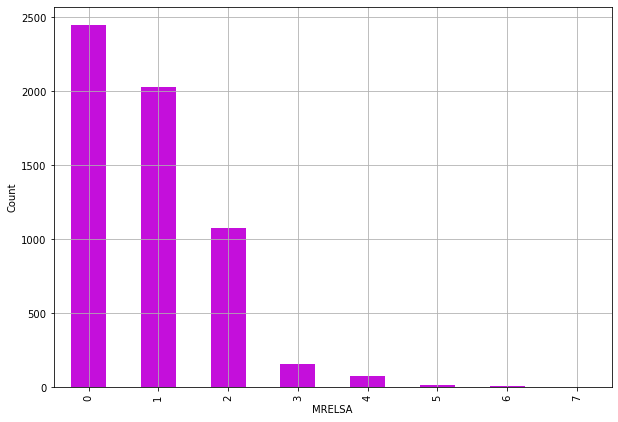

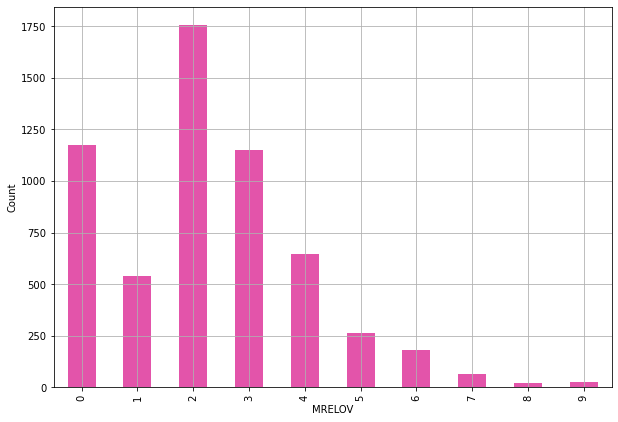

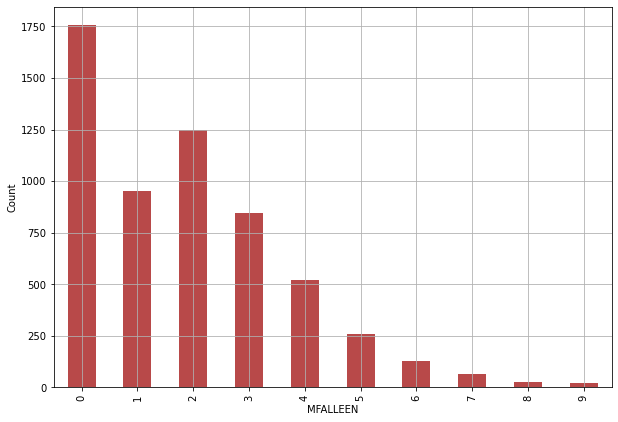

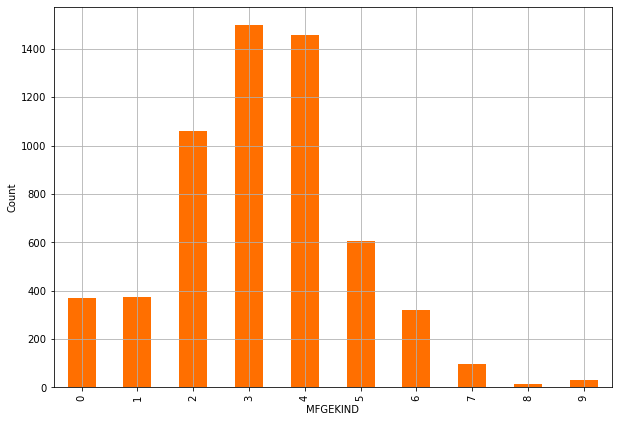

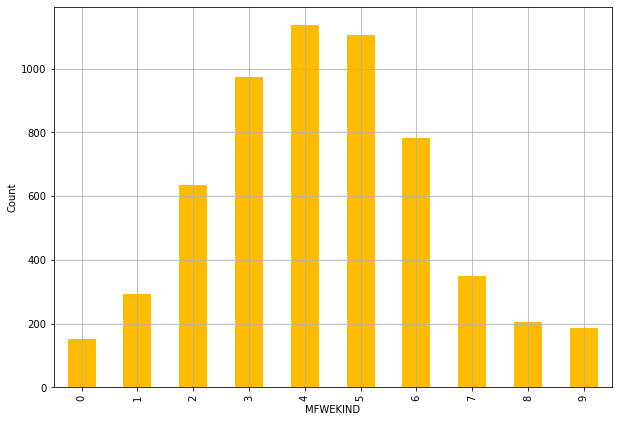

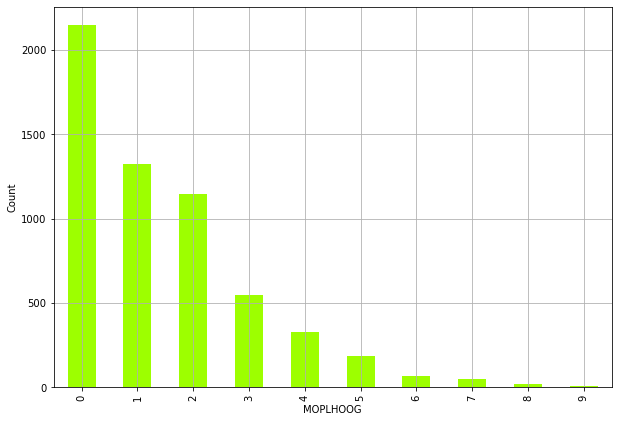

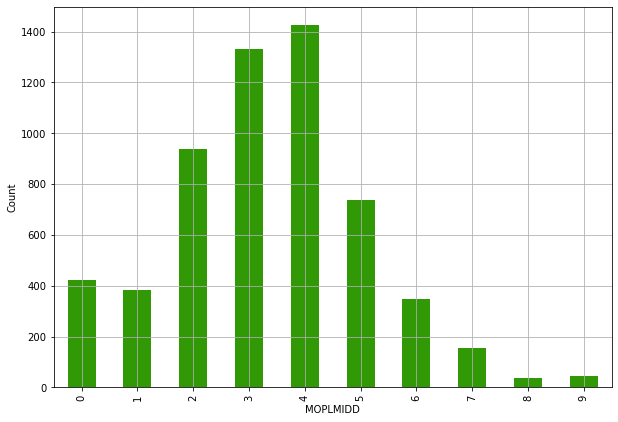

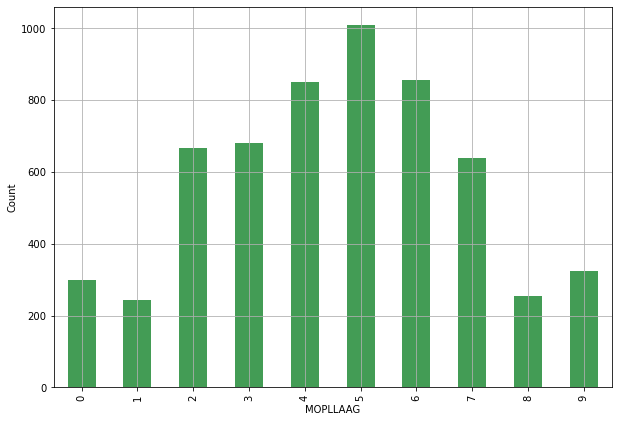

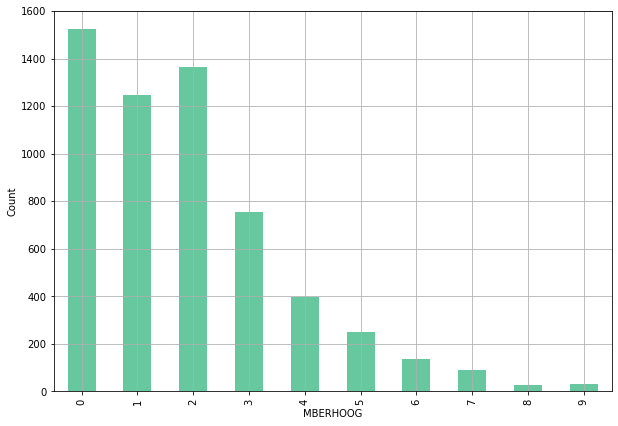

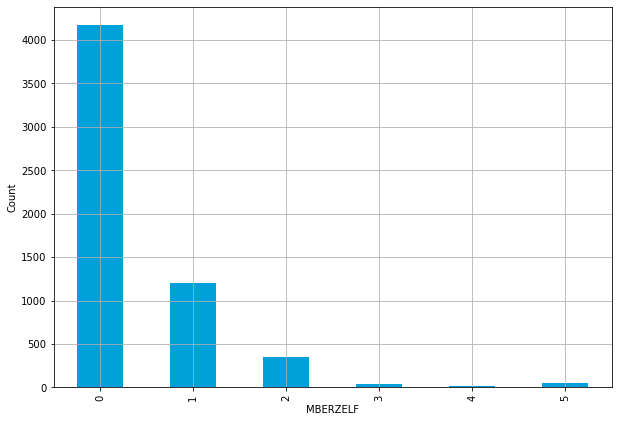

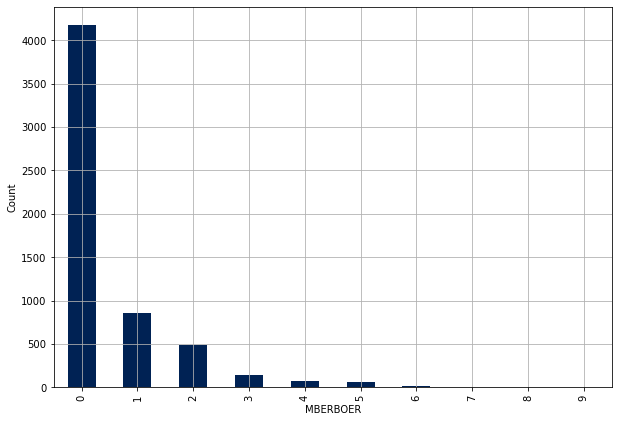

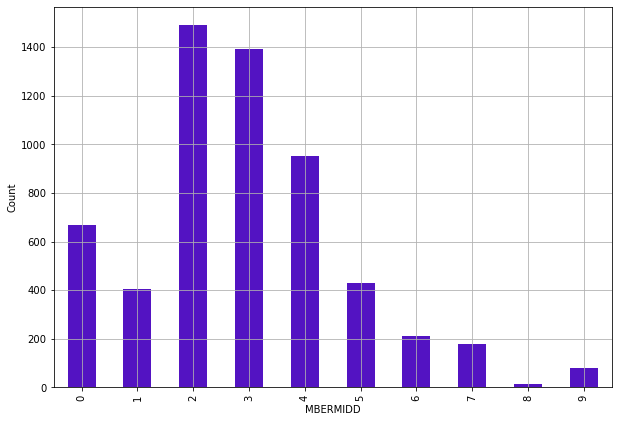

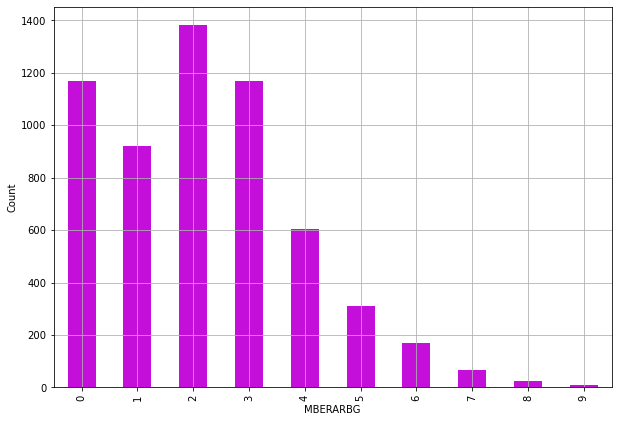

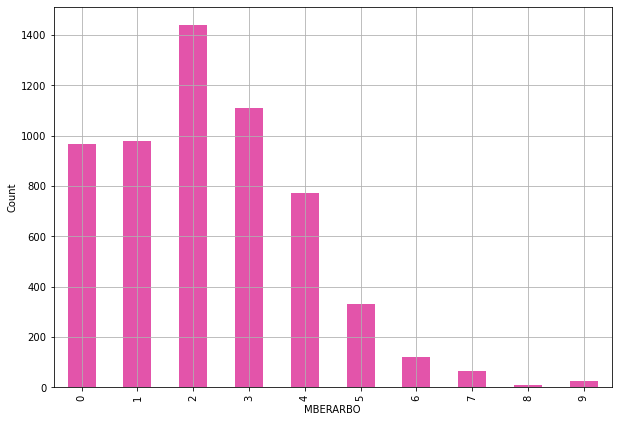

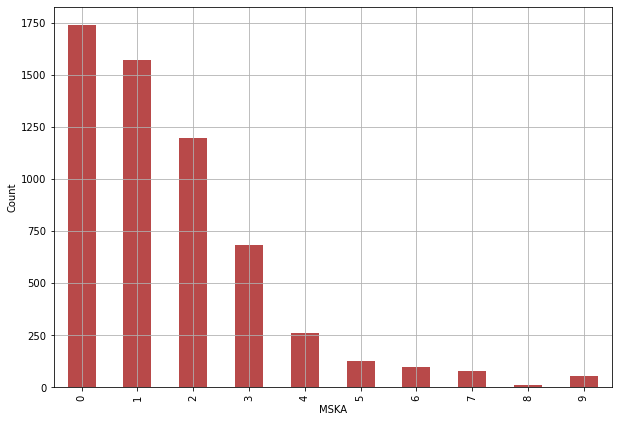

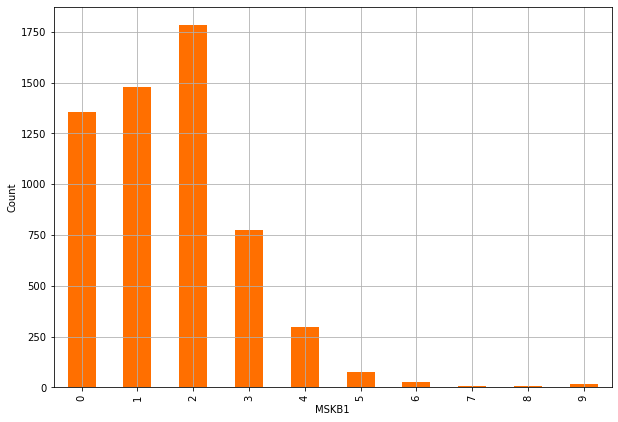

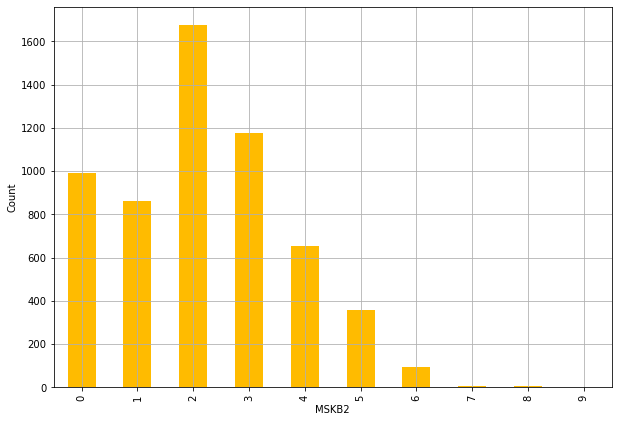

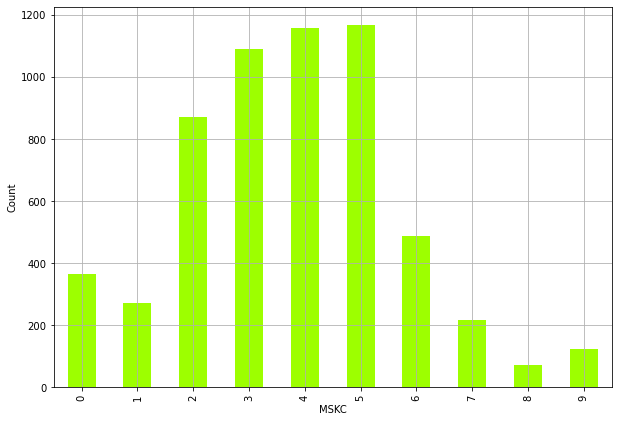

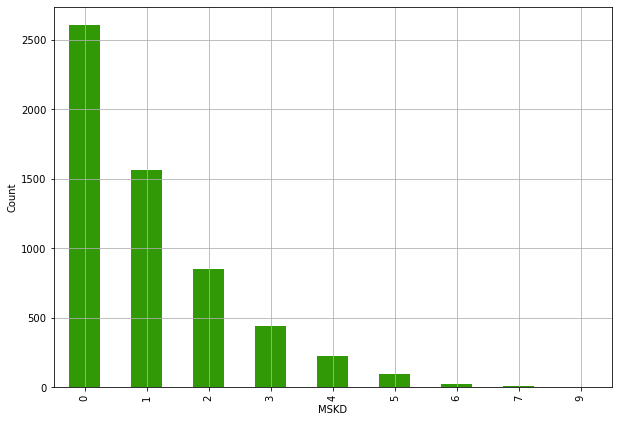

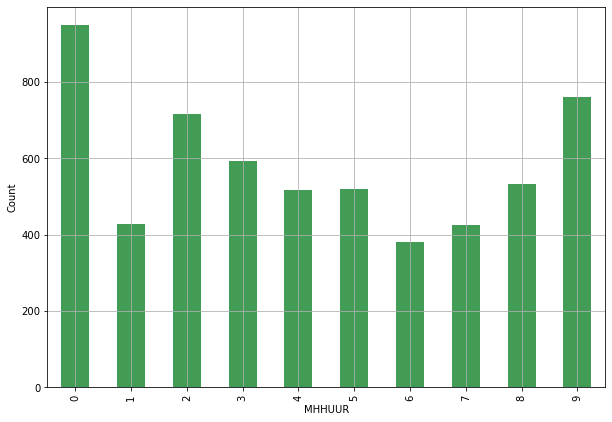

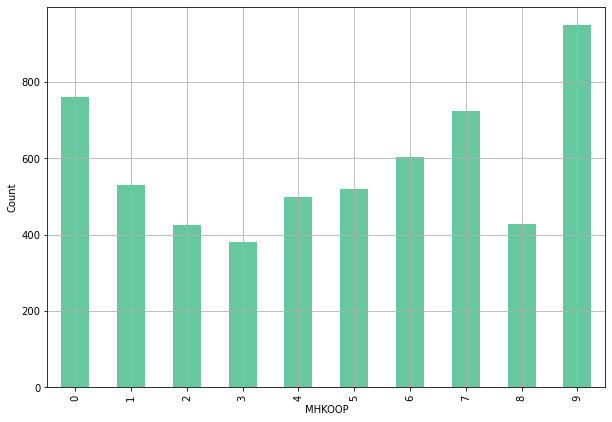

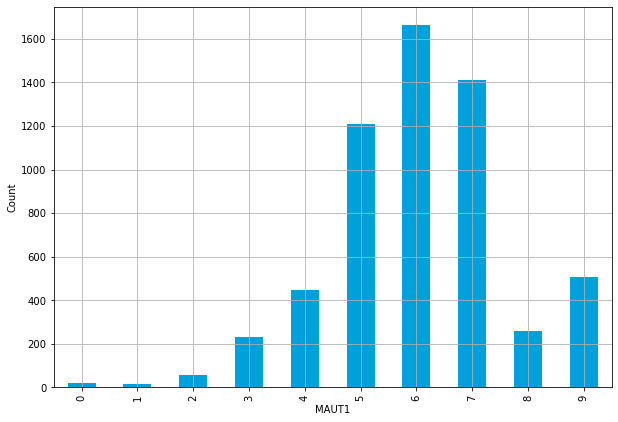

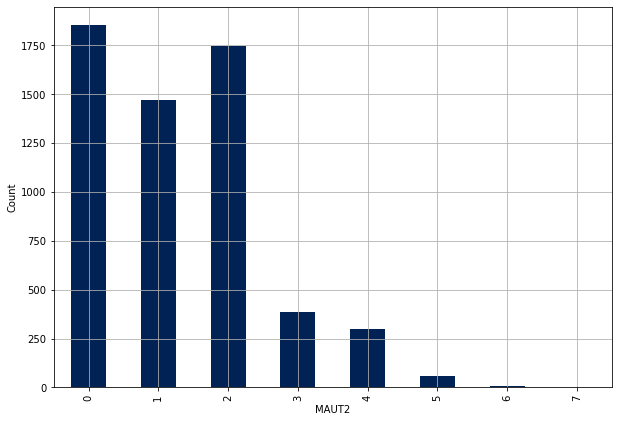

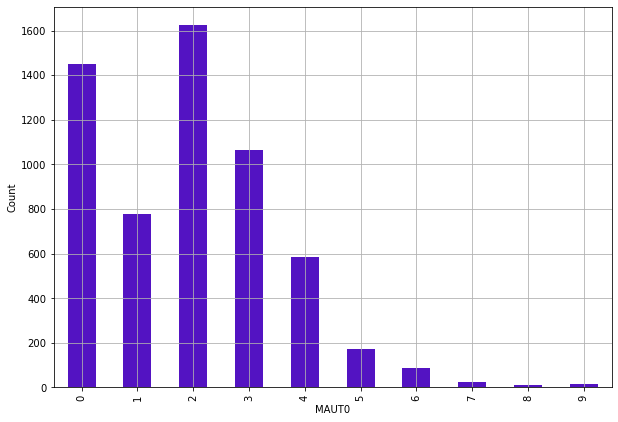

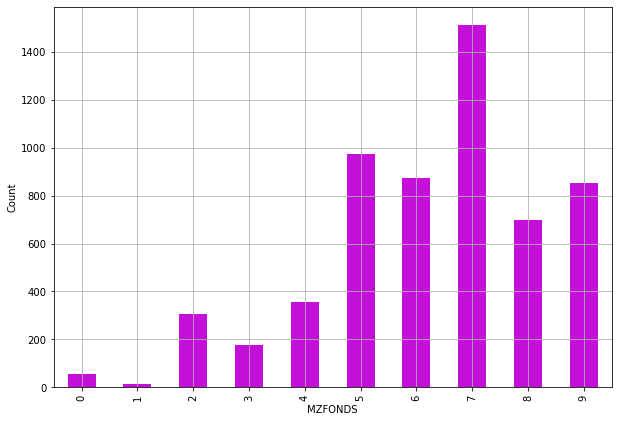

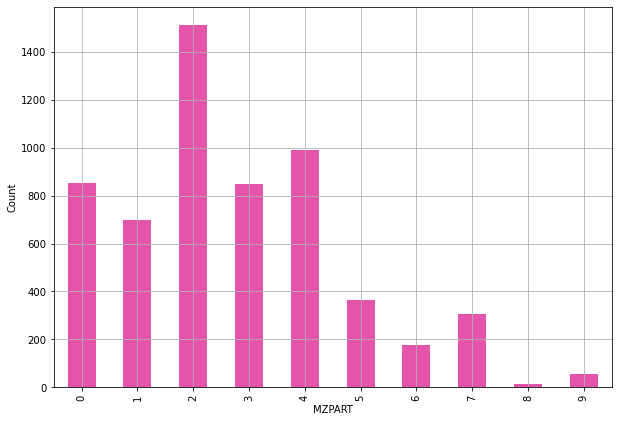

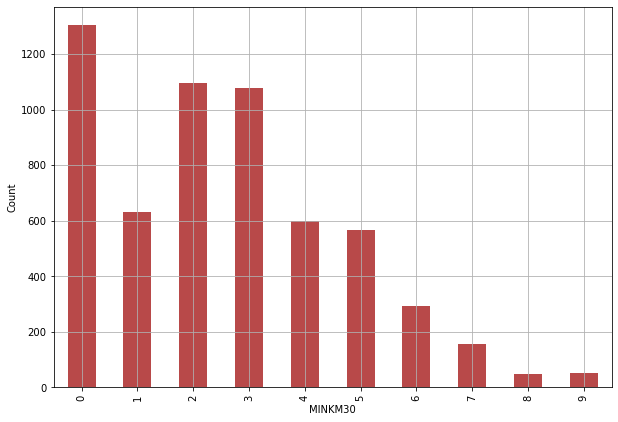

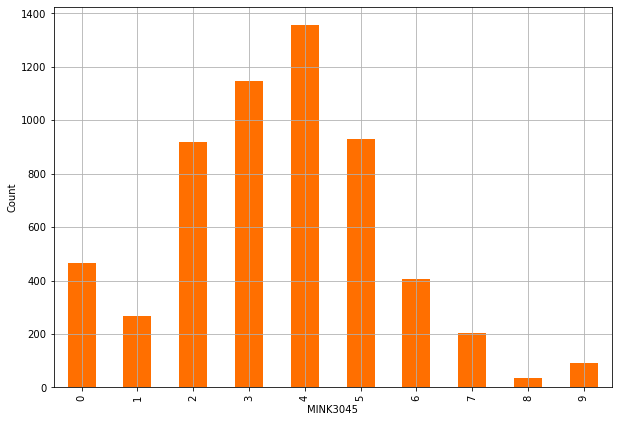

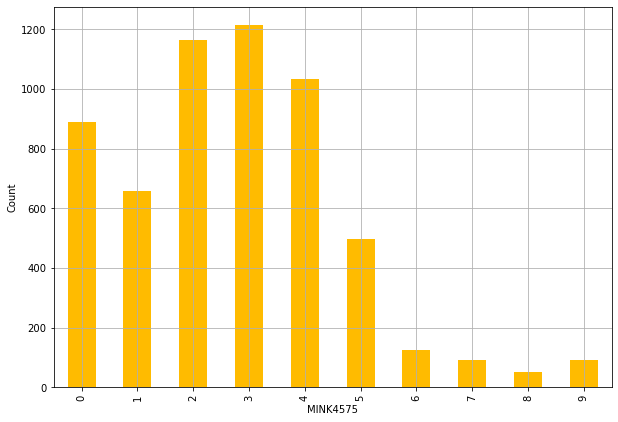

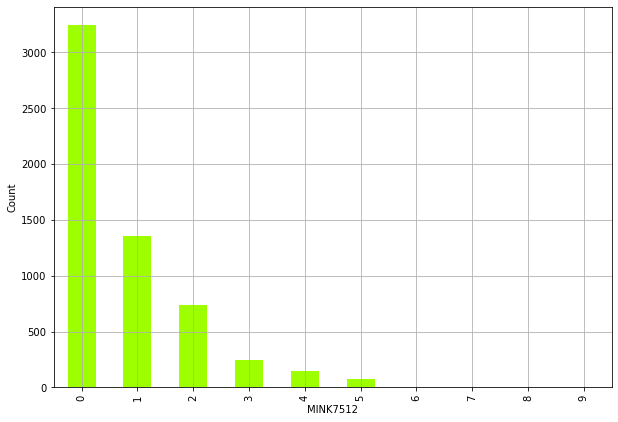

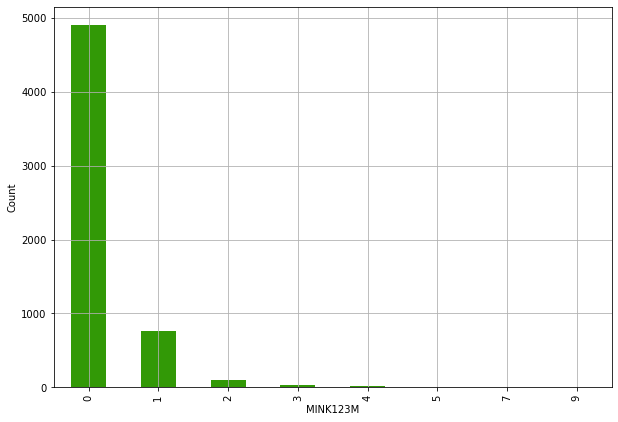

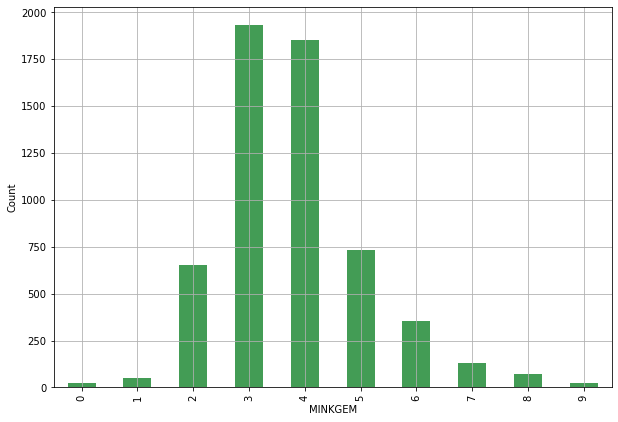

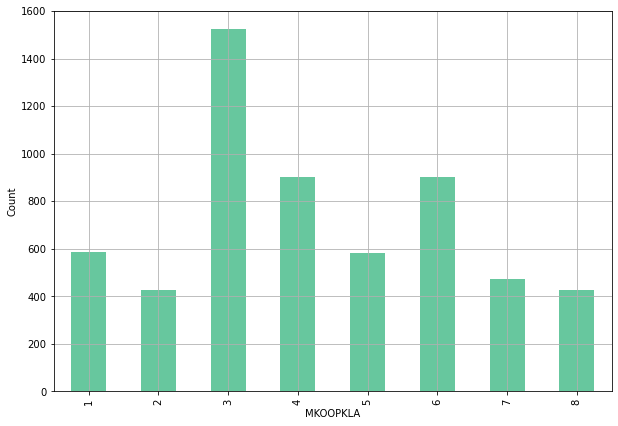

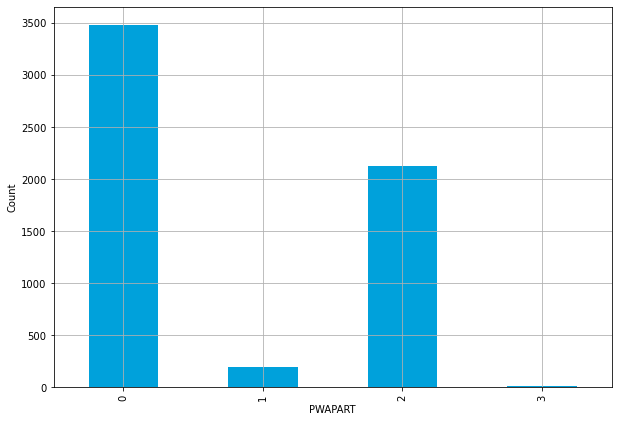

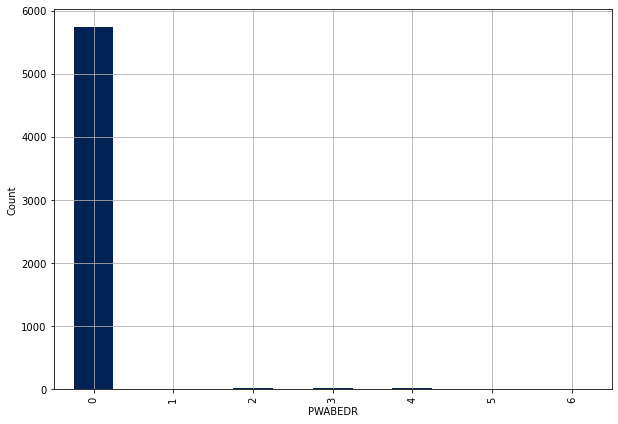

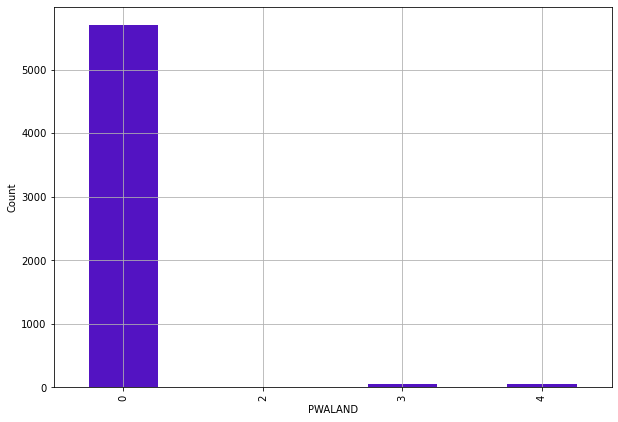

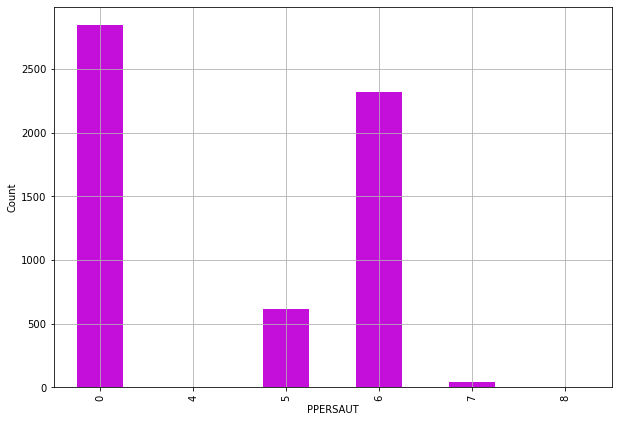

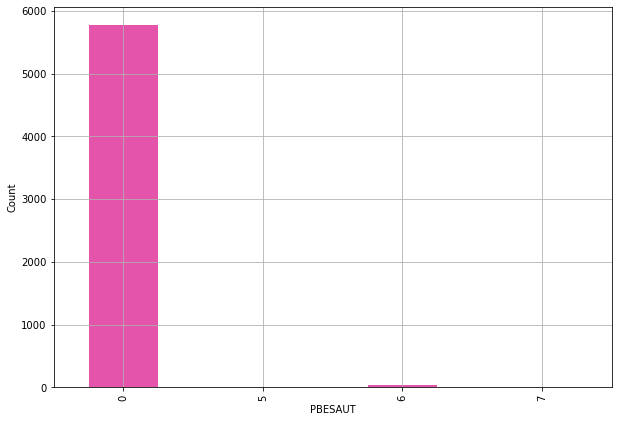

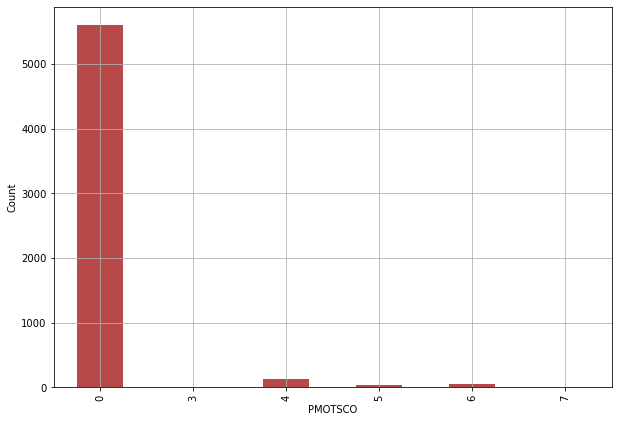

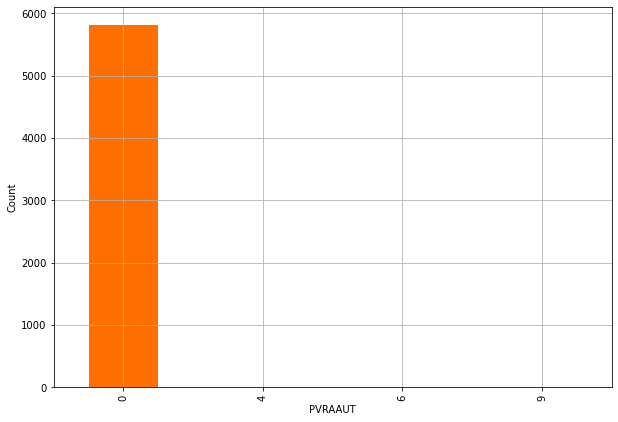

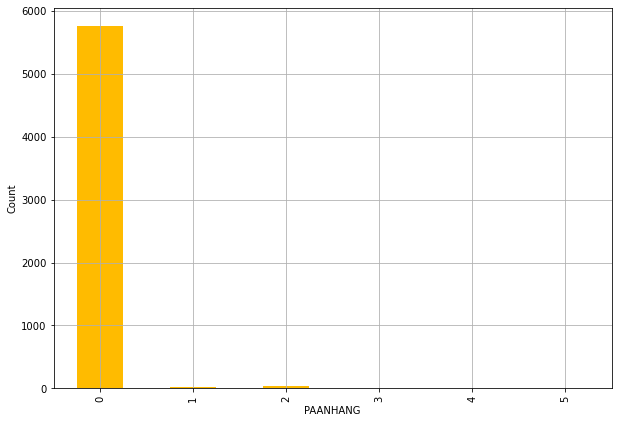

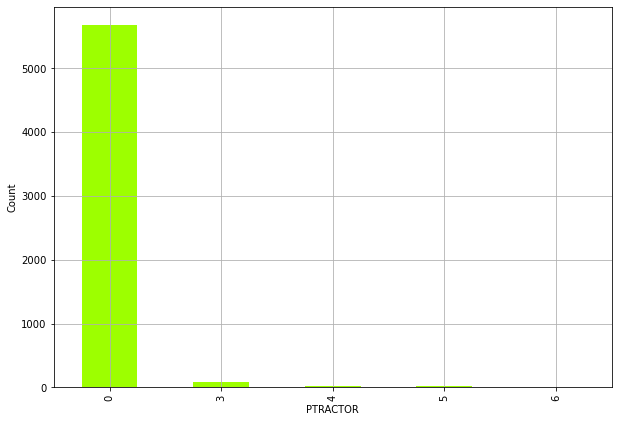

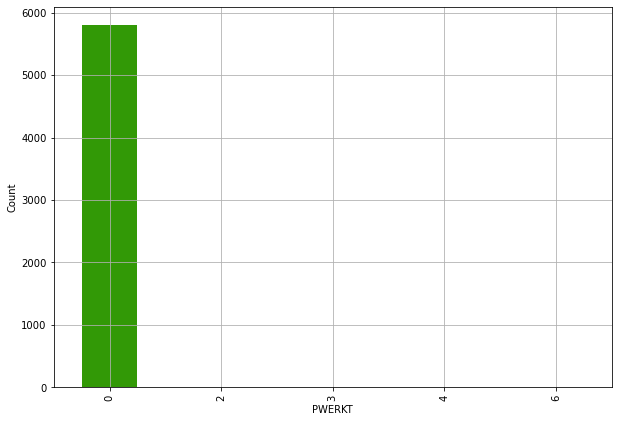

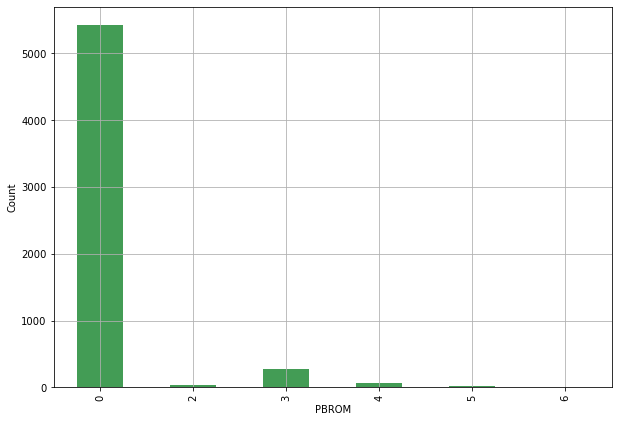

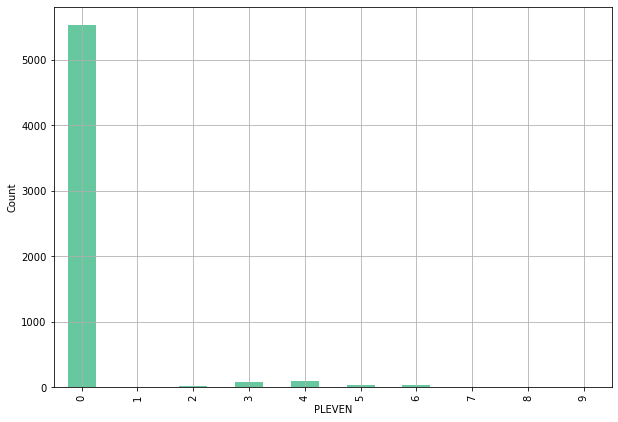

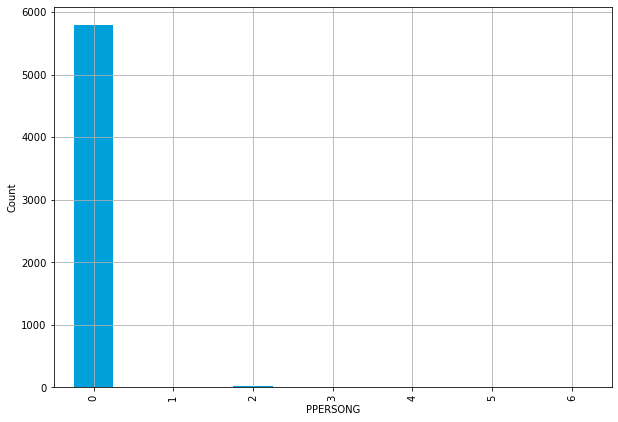

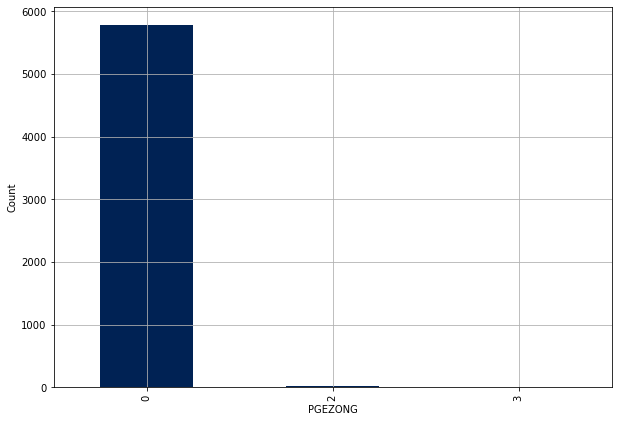

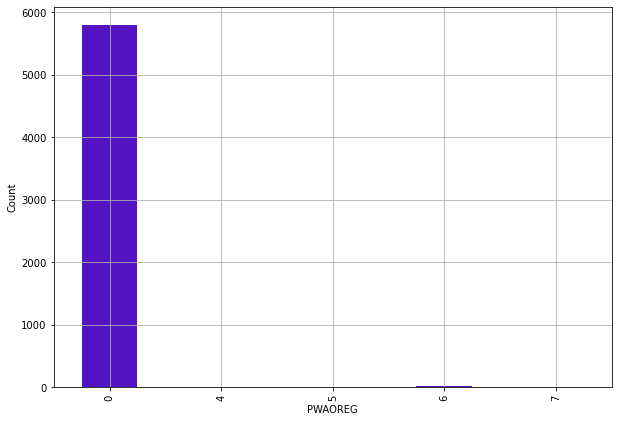

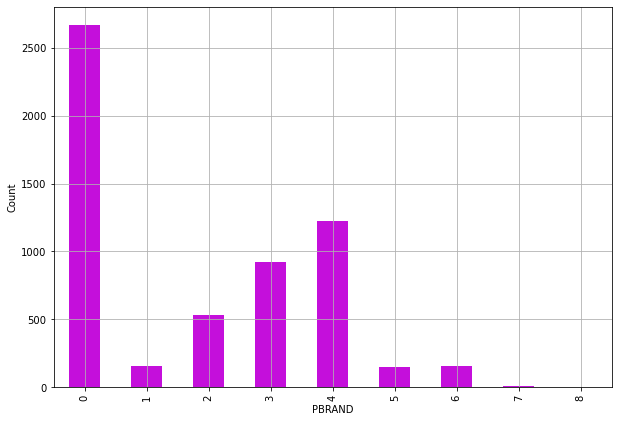

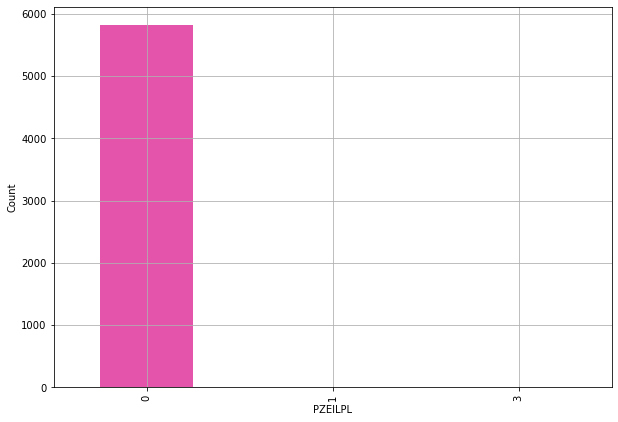

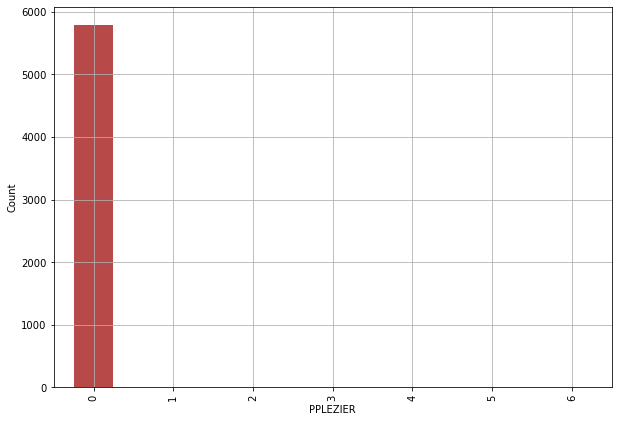

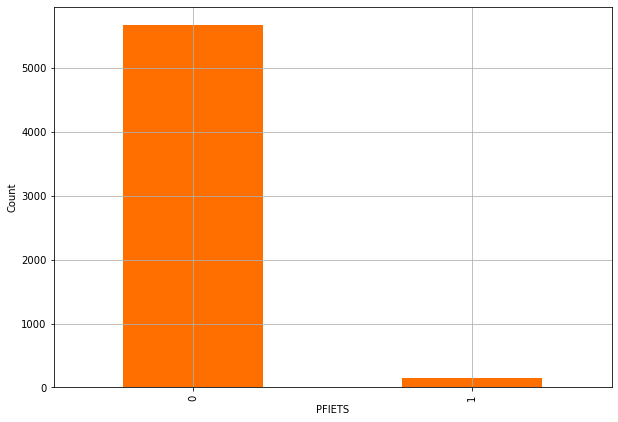

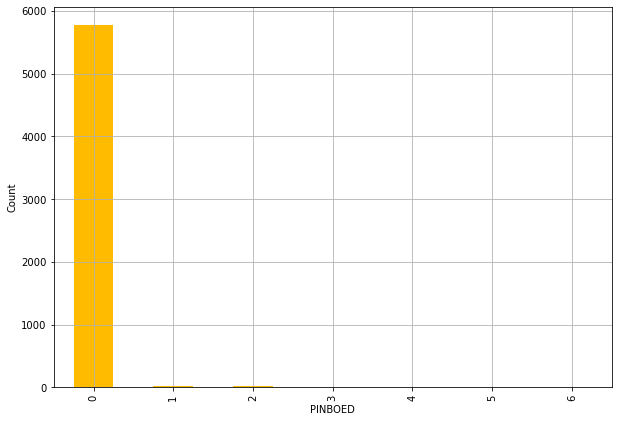

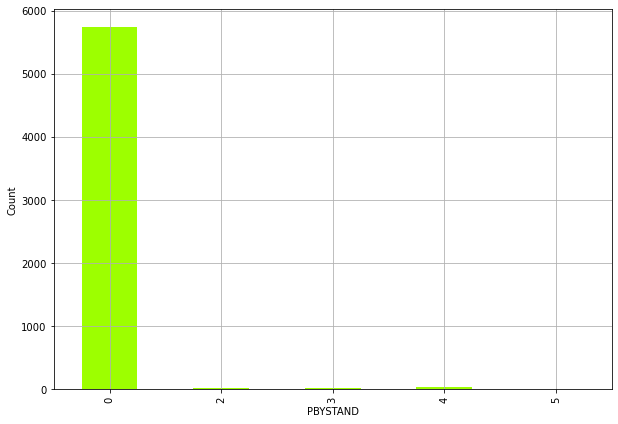

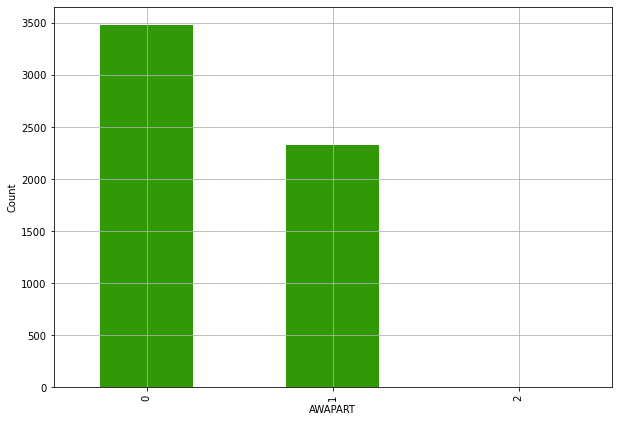

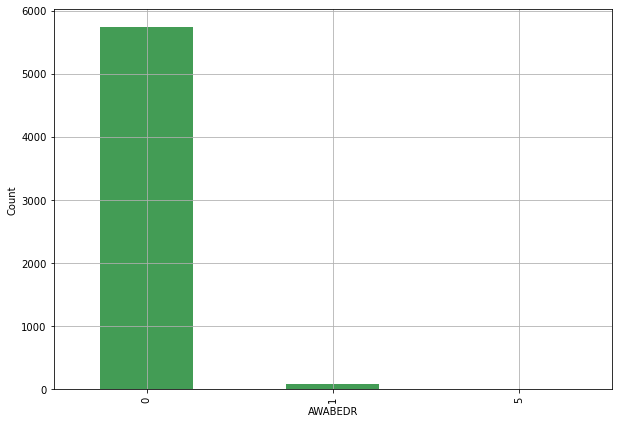

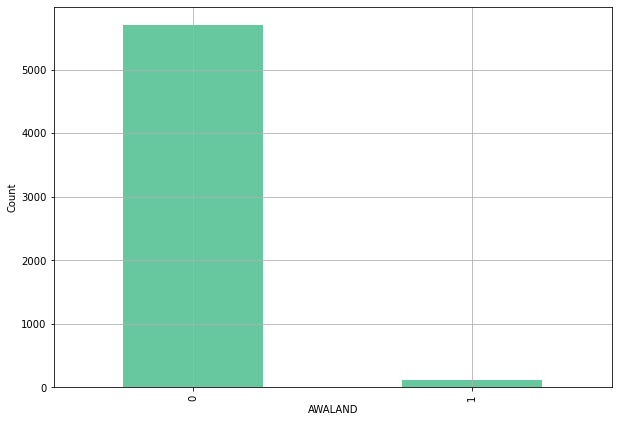

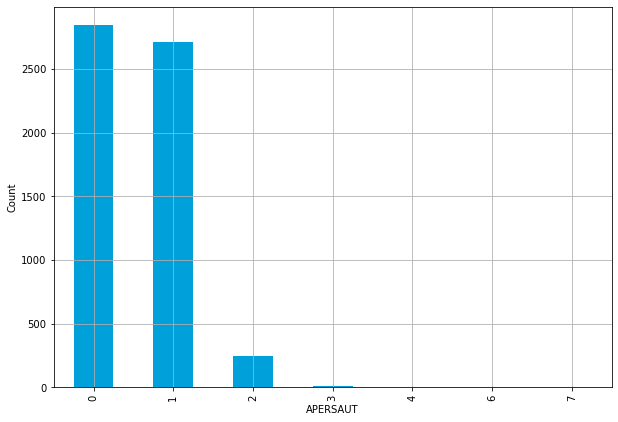

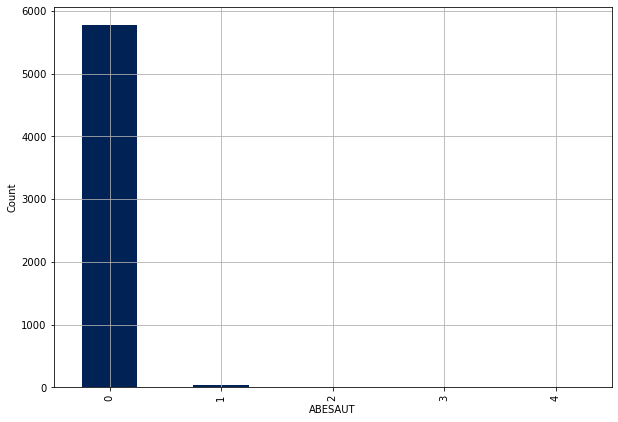

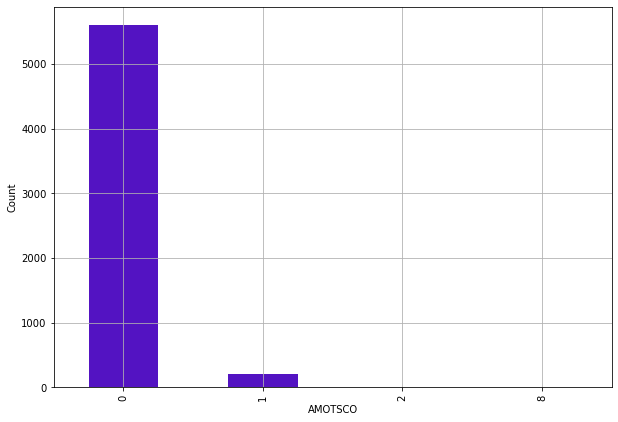

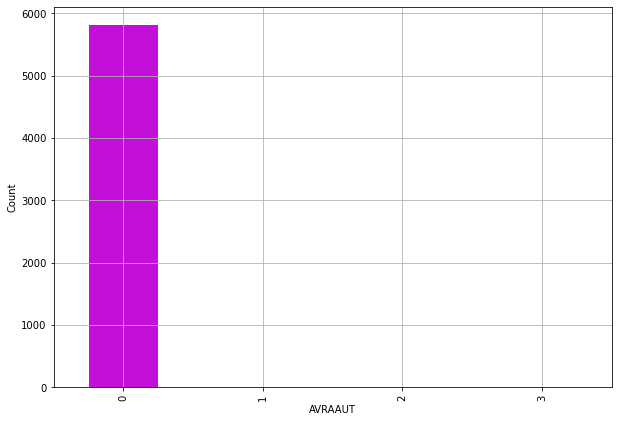

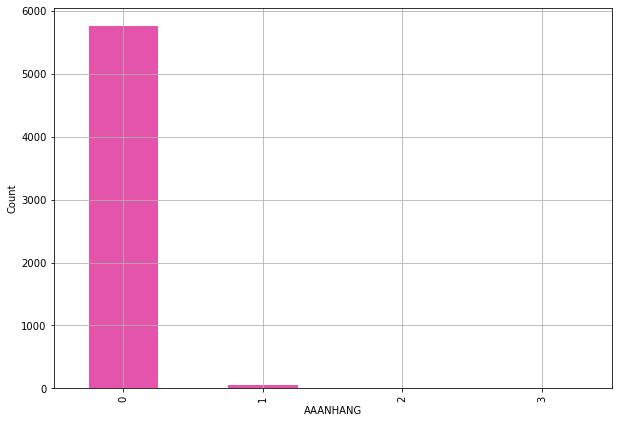

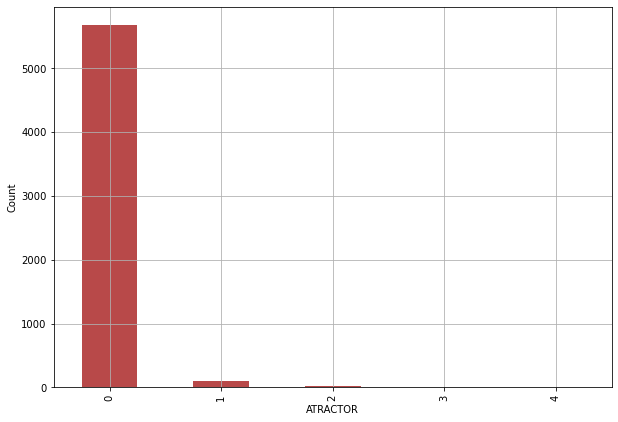

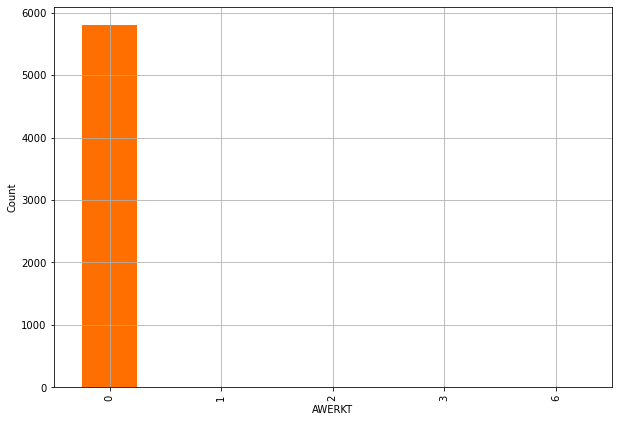

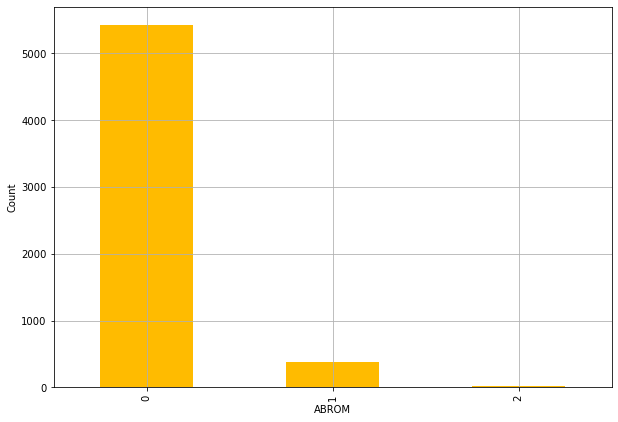

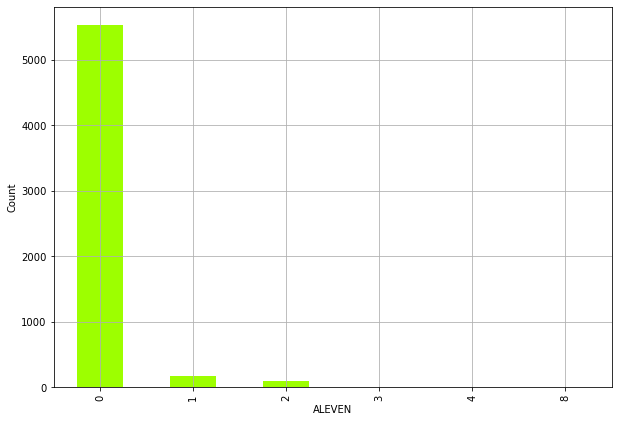

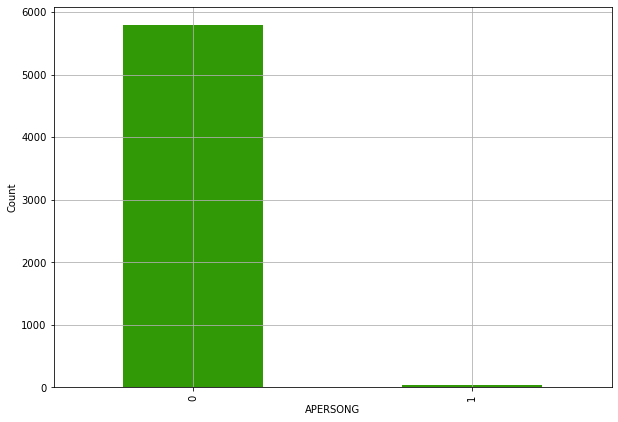

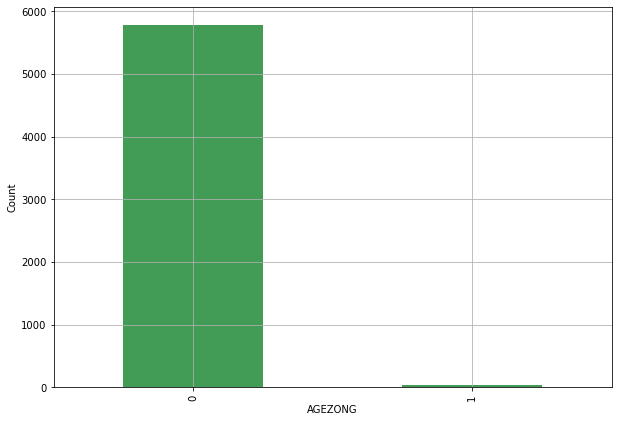

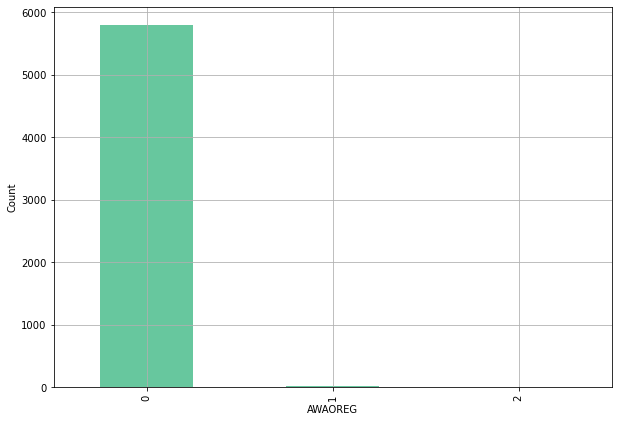

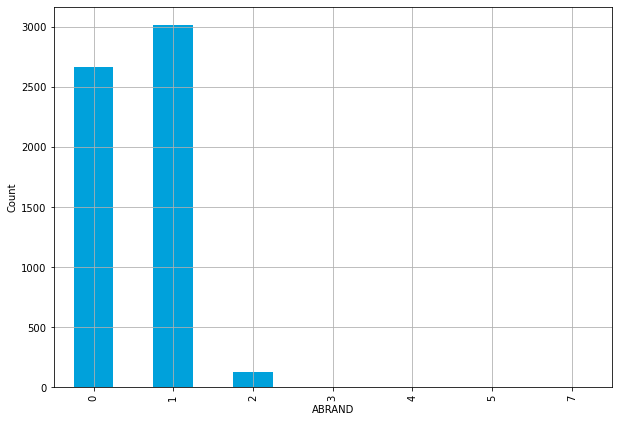

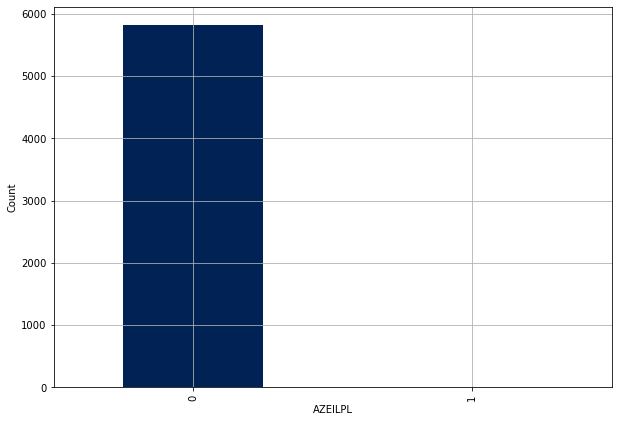

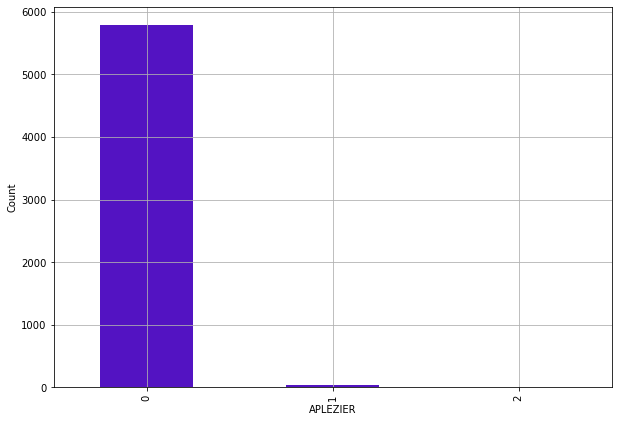

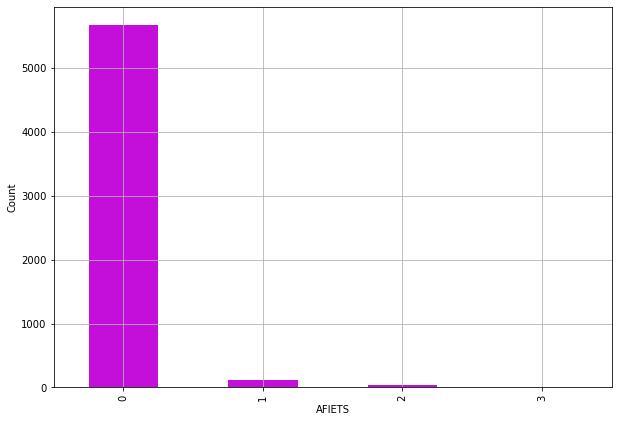

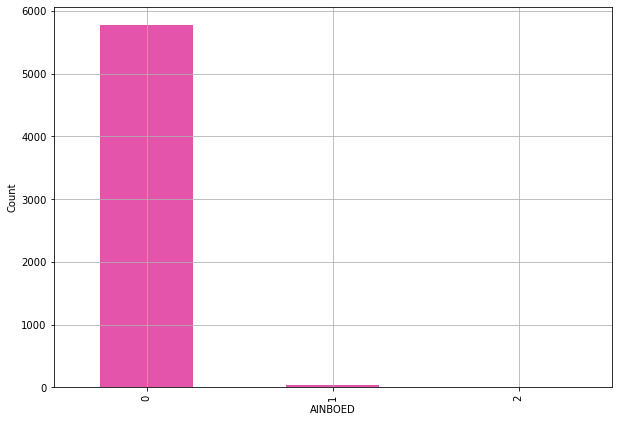

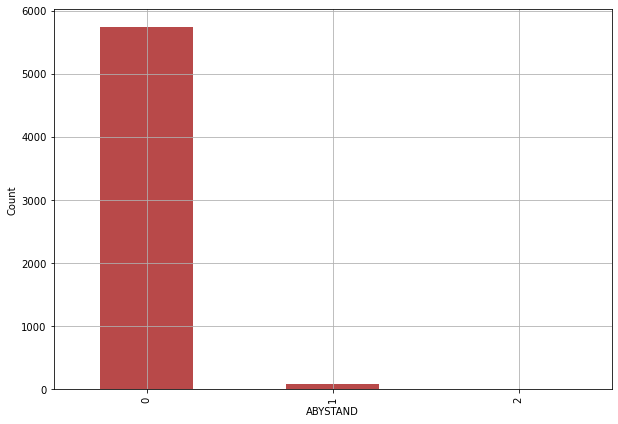

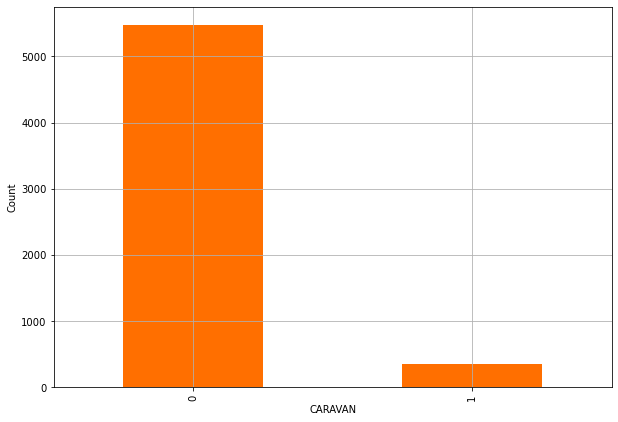

In [10]:
k=0
for i in cols:
    train_data.groupby(i)['CARAVAN'].count().plot(kind='bar', grid=True, color=colors[k%12],
    figsize=(10, 7)).set_ylabel('Count')
    #s='images/'+i+'.png'
    #plt.savefig(s)
    k+=1
    plt.show()

In [11]:
df_1=train_data.copy()

In [12]:
X = df_1.drop(['CARAVAN'], axis=1).values
y = df_1['CARAVAN'].values

In [13]:
print(X.shape)
print(y.shape)

(5822, 85)
(5822,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9339055793991416
[[1086    2]
 [  75    2]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1088
           1       0.50      0.03      0.05        77

    accuracy                           0.93      1165
   macro avg       0.72      0.51      0.51      1165
weighted avg       0.91      0.93      0.91      1165



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
predictions = lr.predict(eval1)
print(accuracy_score(target, predictions))
print(confusion_matrix(target, predictions))
print(classification_report(target, predictions))

0.94025
[[3757    5]
 [ 234    4]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.44      0.02      0.03       238

    accuracy                           0.94      4000
   macro avg       0.69      0.51      0.50      4000
weighted avg       0.91      0.94      0.91      4000



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
CART = DecisionTreeClassifier()
CART.fit(X_train, y_train)
predictions = CART.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8927038626609443
[[1025   63]
 [  62   15]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1088
           1       0.19      0.19      0.19        77

    accuracy                           0.89      1165
   macro avg       0.57      0.57      0.57      1165
weighted avg       0.89      0.89      0.89      1165



In [18]:
CART = DecisionTreeClassifier()
CART.fit(X_train, y_train)
predictions = CART.predict(eval1)
print(accuracy_score(target, predictions))
print(confusion_matrix(target, predictions))
print(classification_report(target, predictions))

0.889
[[3522  240]
 [ 204   34]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3762
           1       0.12      0.14      0.13       238

    accuracy                           0.89      4000
   macro avg       0.53      0.54      0.54      4000
weighted avg       0.90      0.89      0.89      4000



In [19]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
predictions = KNN.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.927038626609442
[[1079    9]
 [  76    1]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1088
           1       0.10      0.01      0.02        77

    accuracy                           0.93      1165
   macro avg       0.52      0.50      0.49      1165
weighted avg       0.88      0.93      0.90      1165



In [20]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
predictions = KNN.predict(eval1)
print(accuracy_score(target, predictions))
print(confusion_matrix(target, predictions))
print(classification_report(target, predictions))

0.937
[[3745   17]
 [ 235    3]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.15      0.01      0.02       238

    accuracy                           0.94      4000
   macro avg       0.55      0.50      0.50      4000
weighted avg       0.89      0.94      0.91      4000



In [21]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
predictions = lda.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9278969957081545
[[1078   10]
 [  74    3]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1088
           1       0.23      0.04      0.07        77

    accuracy                           0.93      1165
   macro avg       0.58      0.51      0.51      1165
weighted avg       0.89      0.93      0.90      1165



In [22]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
predictions = lda.predict(eval1)
print(accuracy_score(target, predictions))
print(confusion_matrix(target, predictions))
print(classification_report(target, predictions))

0.93475
[[3732   30]
 [ 231    7]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3762
           1       0.19      0.03      0.05       238

    accuracy                           0.93      4000
   macro avg       0.57      0.51      0.51      4000
weighted avg       0.90      0.93      0.91      4000



In [23]:
SVM = SVC(gamma='auto')
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9339055793991416
[[1088    0]
 [  77    0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1088
           1       0.00      0.00      0.00        77

    accuracy                           0.93      1165
   macro avg       0.47      0.50      0.48      1165
weighted avg       0.87      0.93      0.90      1165



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
SVM = SVC(gamma='auto')
SVM.fit(X_train, y_train)
predictions = SVM.predict(eval1)
print(accuracy_score(target, predictions))
print(confusion_matrix(target, predictions))
print(classification_report(target, predictions))

0.9405
[[3762    0]
 [ 238    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.00      0.00      0.00       238

    accuracy                           0.94      4000
   macro avg       0.47      0.50      0.48      4000
weighted avg       0.88      0.94      0.91      4000



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt')

In [26]:
# Actual class predictions
rf_predictions = model.predict(X_test)
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

In [27]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[1071   17]
 [  72    5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1088
           1       0.23      0.06      0.10        77

    accuracy                           0.92      1165
   macro avg       0.58      0.52      0.53      1165
weighted avg       0.89      0.92      0.90      1165

Accuracy: 0.9236051502145923


In [31]:
y_pred = classifier.predict(eval1)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(target, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(target, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(target, y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[3712   50]
 [ 229    9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3762
           1       0.15      0.04      0.06       238

    accuracy                           0.93      4000
   macro avg       0.55      0.51      0.51      4000
weighted avg       0.89      0.93      0.91      4000

Accuracy: 0.93025
